In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Saving Y253.JPG to Y253.JPG


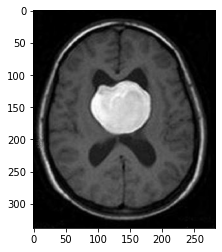

In [25]:
upload = files.upload()
for i in upload.keys():
  z = i
img = cv2.imread(z)
plt.imshow(img)

# GRAYSCALE

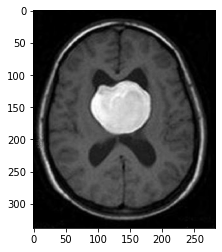

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rows, cols = gray.shape
plt.imshow(gray, cmap="gray")

# GAUSSIAN FILTER

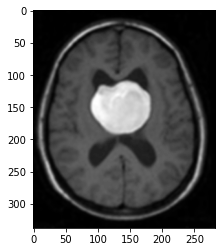

In [27]:
filtered = cv2.GaussianBlur(gray, (5,5),cv2.BORDER_DEFAULT)
plt.imshow(filtered, cmap="gray")

# INVERS

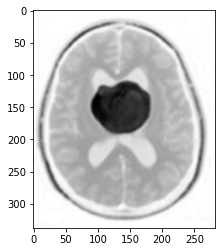

In [28]:
invers = 255 - filtered
plt.imshow(invers, cmap="gray")

# SUBTRACT

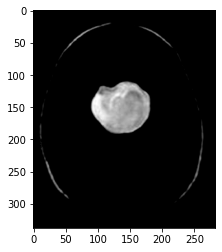

In [29]:
subtracted = cv2.subtract(gray,invers)
plt.imshow(subtracted, cmap="gray")

# THRESHOLDING

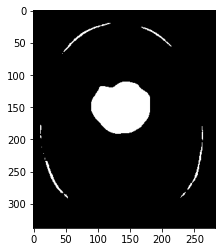

In [30]:
# mengambil nilai dari fungsi treshold incers
ret,thresh = cv2.threshold(subtracted,50,255,cv2.THRESH_BINARY)

# menampilkan gambar
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)

# EROSI

In [0]:
kernel = np.ones((5,5),dtype=int)

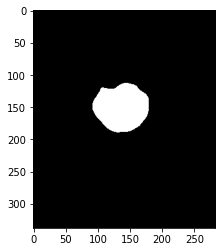

In [32]:
erosi = cv2.erode(thresh,kernel,iterations = 1)
plt.imshow(erosi, cmap="gray")

# OPENING

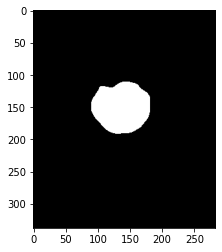

In [33]:
opening = cv2.dilate(erosi,kernel,iterations = 1)
plt.imshow(opening, cmap="gray")

# CONTOURS

In [0]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

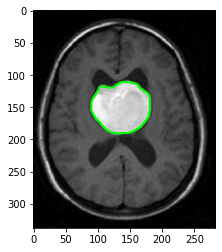

In [35]:
contor = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
plt.imshow(contor, cmap="gray")

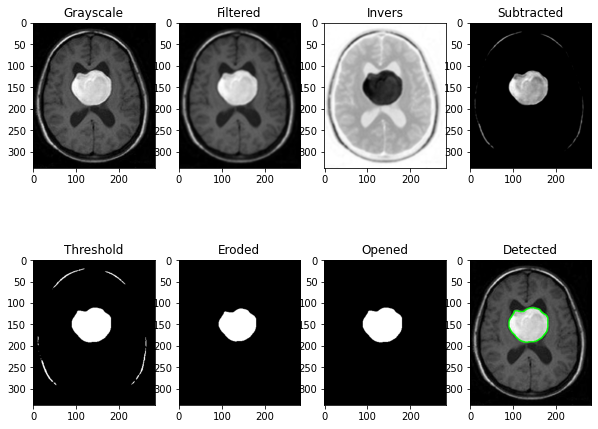

In [36]:
prepocessing = [gray, filtered, invers, subtracted, thresh, erosi, opening, contor]
titles = ['Grayscale', 'Filtered', 'Invers', 'Subtracted', 'Threshold', 'Eroded', 'Opened', "Detected"]
f = plt.figure()
for i in range(len(titles)):
    f.add_subplot(2, 4, i + 1)
    plt.imshow(prepocessing[i], cmap="gray")
    plt.title(titles[i])
    f.set_size_inches(np.array(f.get_size_inches())+0.5)
plt.show()